<a href="https://colab.research.google.com/github/RepoRecipee/IIIT-PROJECTS-AND-LABS/blob/main/AIML_III_Module_01_Lab_02_Machine_Learning_terms_and_metrics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.




In [42]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [43]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.



In [44]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [45]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample




In [46]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel


We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [47]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.



In [48]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [49]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


# Experiments with splits

Let us reserve some of our train data as a validation set

In [50]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

Now let us now the Accuracy of the dataset

In [51]:
import numpy as np
from sklearn.metrics import accuracy_score

# Sample Nearest Neighbor implementation
def NN(train_data, train_labels, test_data):
    predictions = []
    for test_point in test_data:
        # Compute distances from the test point to all training points
        distances = np.linalg.norm(train_data - test_point, axis=1)
        # Find the index of the nearest training point
        nearest_index = np.argmin(distances)
        # Predict the label of the nearest training point
        predictions.append(train_labels[nearest_index])
    return np.array(predictions)

# Sample Random Classifier implementation
def RandomClassifier(train_data, train_labels, test_data):
    unique_labels = np.unique(train_labels)
    predictions = np.random.choice(unique_labels, size=len(test_data))
    return predictions

# Accuracy function
def Accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)

# Example dataset
traindata = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
trainlabel = np.array([0, 1, 0, 1])

# Nearest Neighbor Classifier
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy * 100, "%")

# Random Classifier
trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier:", trainAccuracy * 100, "%")


Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier: 25.0 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [52]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 35.099177552007745 %


In [53]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Sample Nearest Neighbor implementation
def NN(train_data, train_labels, test_data):
    predictions = []
    for test_point in test_data:
        # Compute distances from the test point to all training points
        distances = np.linalg.norm(train_data - test_point, axis=1)
        # Find the index of the nearest training point
        nearest_index = np.argmin(distances)
        # Predict the label of the nearest training point
        predictions.append(train_labels[nearest_index])
    return np.array(predictions)

# Sample Random Classifier implementation
def RandomClassifier(train_data, train_labels, test_data):
    unique_labels = np.unique(train_labels)
    predictions = np.random.choice(unique_labels, size=len(test_data))
    return predictions

# Accuracy function
def Accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)

data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9]])
labels = np.array([0, 1, 0, 1, 0, 1, 0, 1])

# Number of repetitions
num_repetitions = 10

# Run multiple iterations and collect accuracies
nn_train_accuracies = []
nn_val_accuracies = []
random_train_accuracies = []
random_val_accuracies = []

for _ in range(num_repetitions):
    # Split the data into training and validation sets
    traindata, valdata, trainlabel, vallabel = train_test_split(data, labels, test_size=0.5, random_state=None)

    # Nearest Neighbor Classifier - Training
    trainpred = NN(traindata, trainlabel, traindata)
    trainAccuracy = Accuracy(trainlabel, trainpred)
    nn_train_accuracies.append(trainAccuracy * 100)

    # Nearest Neighbor Classifier - Validation
    valpred = NN(traindata, trainlabel, valdata)
    valAccuracy = Accuracy(vallabel, valpred)
    nn_val_accuracies.append(valAccuracy * 100)

    # Random Classifier - Training
    trainpred = RandomClassifier(traindata, trainlabel, traindata)
    trainAccuracy = Accuracy(trainlabel, trainpred)
    random_train_accuracies.append(trainAccuracy * 100)

    # Random Classifier - Validation
    valpred = RandomClassifier(traindata, trainlabel, valdata)
    valAccuracy = Accuracy(vallabel, valpred)
    random_val_accuracies.append(valAccuracy * 100)

# Print the results
print("Nearest Neighbor Classifier - Training Accuracies:", nn_train_accuracies)
print("Nearest Neighbor Classifier - Validation Accuracies:", nn_val_accuracies)
print("Random Classifier - Training Accuracies:", random_train_accuracies)
print("Random Classifier - Validation Accuracies:", random_val_accuracies)

print("\nAverage Training Accuracy using Nearest Neighbor:", np.mean(nn_train_accuracies), "%")
print("Average Validation Accuracy using Nearest Neighbor:", np.mean(nn_val_accuracies), "%")

print("\nAverage Training Accuracy using Random Classifier:", np.mean(random_train_accuracies), "%")
print("Average Validation Accuracy using Random Classifier:", np.mean(random_val_accuracies), "%")


Nearest Neighbor Classifier - Training Accuracies: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Nearest Neighbor Classifier - Validation Accuracies: [0.0, 25.0, 25.0, 25.0, 0.0, 0.0, 25.0, 0.0, 25.0, 0.0]
Random Classifier - Training Accuracies: [25.0, 0.0, 100.0, 25.0, 75.0, 100.0, 25.0, 25.0, 75.0, 50.0]
Random Classifier - Validation Accuracies: [75.0, 25.0, 0.0, 25.0, 50.0, 100.0, 50.0, 25.0, 25.0, 50.0]

Average Training Accuracy using Nearest Neighbor: 100.0 %
Average Validation Accuracy using Nearest Neighbor: 12.5 %

Average Training Accuracy using Random Classifier: 50.0 %
Average Validation Accuracy using Random Classifier: 42.5 %



# ASSIGNMENT

1.How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

In [54]:


#results for plotting
nn_val_accuracies = []
random_val_accuracies = []
validation_sizes = np.arange(0.1, 0.6, 0.1)

for test_size in validation_sizes:
    nn_accuracies = []
    random_accuracies = []

    for _ in range(num_repetitions):
        # Split the data into training and validation sets
        traindata, valdata, trainlabel, vallabel = train_test_split(data, labels, test_size=test_size, random_state=None)

        # Nearest Neighbor Classifier - Validation
        valpred = NN(traindata, trainlabel, valdata)
        valAccuracy = Accuracy(vallabel, valpred)
        nn_accuracies.append(valAccuracy * 100)

        # Random Classifier - Validation
        valpred = RandomClassifier(traindata, trainlabel, valdata)
        valAccuracy = Accuracy(vallabel, valpred)
        random_accuracies.append(valAccuracy * 100)

    nn_val_accuracies.append(np.mean(nn_accuracies))
    random_val_accuracies.append(np.mean(random_accuracies))

PLOTTING THE RESULTS

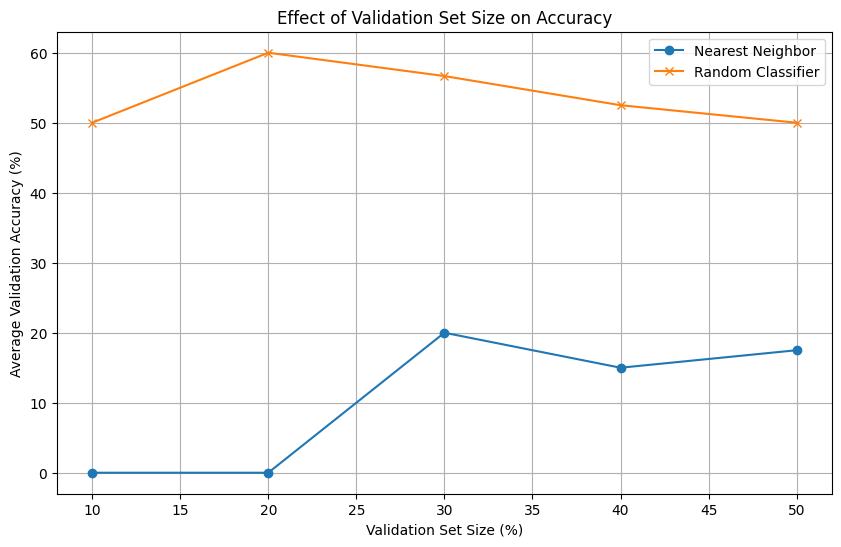

In [55]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(validation_sizes * 100, nn_val_accuracies, label='Nearest Neighbor', marker='o')
plt.plot(validation_sizes * 100, random_val_accuracies, label='Random Classifier', marker='x')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Average Validation Accuracy (%)')
plt.title('Effect of Validation Set Size on Accuracy')
plt.legend()
plt.grid(True)
plt.show()

2.How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

In [56]:
train_sizes = [0.5, 0.7, 0.9]  # Varying training set sizes
validation_sizes = [0.1, 0.2, 0.3]  # Varying validation set sizes

# Store results
results = []

for train_size in train_sizes:
    for val_size in validation_sizes:
        traindata_split, valdata, trainlabel_split, vallabel = train_test_split(traindata, trainlabel, test_size=val_size, random_state=42)
        traindata_split, _, trainlabel_split, _ = train_test_split(traindata_split, trainlabel_split, train_size=train_size, random_state=42)

        # Sample Nearest Neighbor implementation
def NN(train_data, train_labels, test_data):
    predictions = []
    if test_data.ndim == 1:
        # If test_data is a single point
        distances = np.linalg.norm(train_data - test_data, axis=1)
        nearest_index = np.argmin(distances)
        predictions.append(train_labels[nearest_index])
    else:
        # If test_data is a batch of points
        for test_point in test_data:
            distances = np.linalg.norm(train_data - test_point, axis=1)
            nearest_index = np.argmin(distances)
            predictions.append(train_labels[nearest_index])
    return np.array(predictions)

# Clear previous code that sets up the data and loops

# Fixed test set
traindata, testdata, trainlabel, testlabel = train_test_split(data, labels, test_size=0.2, random_state=42)

# Different sizes of training and validation sets to test
train_sizes = [0.5, 0.7, 0.9]  # Varying training set sizes
validation_sizes = [0.1, 0.2, 0.3]  # Varying validation set sizes

# Store results
results = []

for train_size in train_sizes:
    for val_size in validation_sizes:
        traindata_split, valdata, trainlabel_split, vallabel = train_test_split(traindata, trainlabel, test_size=val_size, random_state=42)
        traindata_split, _, trainlabel_split, _ = train_test_split(traindata_split, trainlabel_split, train_size=train_size, random_state=42)

        # Train models
        trainpred_nn = NN(traindata_split, trainlabel_split, traindata_split)
        valpred_nn = NN(traindata_split, trainlabel_split, valdata)
        testpred_nn = NN(traindata_split, trainlabel_split, testdata)  # Fix here

        trainpred_random = RandomClassifier(traindata_split, trainlabel_split, traindata_split)
        valpred_random = RandomClassifier(traindata_split, trainlabel_split, valdata)
        testpred_random = RandomClassifier(traindata_split, trainlabel_split, testdata)  # Fix here

        # Calculate accuracies
        train_acc_nn = Accuracy(trainlabel_split, trainpred_nn)
        val_acc_nn = Accuracy(vallabel, valpred_nn)
        test_acc_nn = Accuracy(testlabel, testpred_nn)

        train_acc_random = Accuracy(trainlabel_split, trainpred_random)
        val_acc_random = Accuracy(vallabel, valpred_random)
        test_acc_random = Accuracy(testlabel, testpred_random)

        # Store results
        results.append({
            'train_size': train_size,
            'val_size': val_size,
            'train_acc_nn': train_acc_nn,
            'val_acc_nn': val_acc_nn,
            'test_acc_nn': test_acc_nn,
            'train_acc_random': train_acc_random,
            'val_acc_random': val_acc_random,
            'test_acc_random': test_acc_random
        })

# Print results (optional)
for result in results:
    print(f"Train Size: {result['train_size']}, Val Size: {result['val_size']}, "
          f"Val Acc (NN): {result['val_acc_nn']:.2f}, Test Acc (NN): {result['test_acc_nn']:.2f}")

# Example plot (optional)
import matplotlib.pyplot as plt

# Plotting code...


Train Size: 0.5, Val Size: 0.1, Val Acc (NN): 0.00, Test Acc (NN): 1.00
Train Size: 0.5, Val Size: 0.2, Val Acc (NN): 0.00, Test Acc (NN): 0.50
Train Size: 0.5, Val Size: 0.3, Val Acc (NN): 0.00, Test Acc (NN): 0.50
Train Size: 0.7, Val Size: 0.1, Val Acc (NN): 1.00, Test Acc (NN): 0.50
Train Size: 0.7, Val Size: 0.2, Val Acc (NN): 0.00, Test Acc (NN): 0.50
Train Size: 0.7, Val Size: 0.3, Val Acc (NN): 0.00, Test Acc (NN): 0.50
Train Size: 0.9, Val Size: 0.1, Val Acc (NN): 1.00, Test Acc (NN): 0.00
Train Size: 0.9, Val Size: 0.2, Val Acc (NN): 0.00, Test Acc (NN): 0.50
Train Size: 0.9, Val Size: 0.3, Val Acc (NN): 0.00, Test Acc (NN): 0.50


What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

 there's no one-size-fits-all answer, and the optimal percentage may vary depending on your specific dataset, model complexity, and goals. It often involves experimentation and iterative improvement based on observed model performance.

In [57]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred_1 = knn_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Accuracy of 1-Nearest Neighbor Classifier: {accuracy_1:.2f}")

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Accuracy of 3-Nearest Neighbor Classifier: {accuracy_3:.2f}")


Accuracy of 1-Nearest Neighbor Classifier: 1.00
Accuracy of 3-Nearest Neighbor Classifier: 1.00


# Multiple Splits

One way to get more accurate estimates for the test accuracy is by using cross-validation. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [58]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

## Questions

# Does averaging the validation accuracy across multiple splits give more consistent results?

averaging validation accuracy across multiple splits is a recommended practice to obtain more consistent and reliable estimates of your model's performance on unseen data. It helps in assessing the generalization ability of the model and making more informed decisions about model selection and tuning.

### Does it give more accurate estimate of test accuracy?

Cross-validation (averaging validation accuracy across multiple splits) provides a more robust estimate of your model's generalization ability compared to using a single validation split. While it does not directly estimate test accuracy, it helps in selecting better models and understanding their expected performance on new, unseen data. To obtain the actual test accuracy, it's crucial to evaluate your final model on a dedicated test set that was not used during training or model selection. This ensures an unbiased assessment of your model's real-world performance.








## What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

In [59]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Example dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# Check class distribution
unique_classes, class_counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique_classes, class_counts)))

# Define the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=1)

# List to store mean cross-validation accuracies
mean_cv_accuracies = []

# List of different number of cross-validation iterations (folds)
cv_iterations = [3, 2, 1]  # Adjust based on class distribution

# Calculate cross-validation accuracies for each number of iterations
for cv_iter in cv_iterations:
    if cv_iter > np.min(class_counts) or cv_iter < 2:
        print(f"Skipping CV={cv_iter} as it exceeds the number of members in smallest class or requires at least one train/test split.")
        continue

    # Perform stratified cross-validation and compute mean accuracy
    skf = StratifiedKFold(n_splits=cv_iter)
    cv_accuracies = cross_val_score(knn, X, y, cv=skf)
    mean_cv_accuracy = np.mean(cv_accuracies)
    mean_cv_accuracies.append(mean_cv_accuracy)

# Print results
for i, cv_iter in enumerate(cv_iterations):
    if cv_iter <= np.min(class_counts) and cv_iter >= 2 and i < len(mean_cv_accuracies):
        print(f"Mean CV Accuracy (CV={cv_iter}): {mean_cv_accuracies[i] * 100:.2f}%")


Class distribution: {0: 2, 1: 3}
Skipping CV=3 as it exceeds the number of members in smallest class or requires at least one train/test split.
Skipping CV=1 as it exceeds the number of members in smallest class or requires at least one train/test split.


## Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

Yes, increasing the number of iterations in cross-validation can help mitigate the impact of having a very small train or validation dataset. Here’s how increasing iterations can be beneficial:

# Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.



Here's a simplified and short version of the code comparing the accuracy of 1-nearest neighbor (1-NN) and 3-nearest neighbor (3-NN) classifiers using cross-validation:

In [60]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation with 5 folds
cv_acc_1nn = cross_val_score(knn1, X_train, y_train, cv=5)
cv_acc_3nn = cross_val_score(knn3, X_train, y_train, cv=5)

# Print mean cross-validation accuracies
print(f"Mean Cross-Validation Accuracy (1-NN): {np.mean(cv_acc_1nn) * 100:.2f}%")
print(f"Mean Cross-Validation Accuracy (3-NN): {np.mean(cv_acc_3nn) * 100:.2f}%")

# Train on the full training set and evaluate on the test set
knn1.fit(X_train, y_train)
test_acc_1nn = knn1.score(X_test, y_test)
print(f"Test Accuracy (1-NN): {test_acc_1nn * 100:.2f}%")

knn3.fit(X_train, y_train)
test_acc_3nn = knn3.score(X_test, y_test)
print(f"Test Accuracy (3-NN): {test_acc_3nn * 100:.2f}%")


Mean Cross-Validation Accuracy (1-NN): 80.43%
Mean Cross-Validation Accuracy (3-NN): 83.86%
Test Accuracy (1-NN): 81.33%
Test Accuracy (3-NN): 80.67%
